# Projeto 1 - Modelo de Classificação

### Projeto realizado por :

#### 
* Cosmin Trandafir - 57101
* Martim Baptista - 56323
* João Serafim - 56376
* Martim Paraíba - 56273
***

#### Counter de horas I guess :{}

* Cosmin Trandafir - 4h
* Martim Baptista - 
* João Serafim - 3h
* Martim Paraíba - 
***

### A adicionar
- Dividir o dataset em treino e teste e não tocar no teste ate ao final
- Usar MCC em vez de F1
- Adicionar KNNClassifier e NaiveBayes
- Não vale a pena usar PCA pq cria novas features que não conseguem ser explicadas
- Fazer graficos para as Features Selectors para melhor n_features
- 

Questoes: 
- Devemos apagar colunas que possuem demasiados valores a zero?
- Devemos testar e mostrar os testes de todos os hyperparametros ou apenas os principais?
- Diferentes resultados de melhor imputer aparecem. Qual devemos confiar?


### Neste projeto vamos usar o dataset: ***biodegradable_a.cvs*** 

In [14]:
import pandas as pd

#Load biodegradable dataset

bio_df = pd.read_csv("biodegradable_a.csv")
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4564 entries, 0 to 4563
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SpMax_L        4564 non-null   float64
 1   J_Dz(e)        4564 non-null   float64
 2   nHM            4564 non-null   float64
 3   F01            4049 non-null   float64
 4   F04            4564 non-null   float64
 5   NssssC         4564 non-null   float64
 6   nCb            4564 non-null   float64
 7   C              3797 non-null   float64
 8   nCp            3893 non-null   float64
 9   nO             4564 non-null   float64
 10  F03            4564 non-null   float64
 11  SdssC          4564 non-null   float64
 12  HyWi_B         4085 non-null   float64
 13  LOC            4564 non-null   float64
 14  SM6_L          4564 non-null   float64
 15  F03_CO         4521 non-null   float64
 16  Me             4116 non-null   float64
 17  Mi             4564 non-null   float64
 18  nN_N    

## Generic functions and Imports

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
def classification_scores(y_test, y_pred):
    # Evaluate the performance of the model using various metrics
    print("The Precision is: %7.4f" % precision_score(y_test, y_pred))
    print("The Recall is: %7.4f" % recall_score(y_test, y_pred))
    print("The F1 score is: %7.4f" % f1_score(y_test, y_pred))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Returns mean crossvalidation score
def evaluate_model(imputer_tuple, scaler_tuple, classifier, X_train, X_test, y_train):
    imputer = imputer_tuple[1]
    # Impute missing values
    imputer.fit(X_train)
    X_train_imputed = imputer.transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    scaler = scaler_tuple[1]
    # Scale the test data
    scaler.fit(X_train_imputed)
    X_train_scaled = scaler.transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)
    
    # Train the classifier
    classifier.fit(X_train_scaled, y_train)
    preds = classifier.predict(X_test_scaled)
    
    # Compute cross-validation scores
    cv_scores = cross_val_score(classifier, X_test_scaled, y_test, cv=10)
    mean_cv_score = cv_scores.mean()
    
    # Print classificatiom metric scores
    print("Imputer: {} \nScaler: {}\nCrossValidationScore: {:.6f}\n".format(imputer_tuple[0], scaler_tuple[0], mean_cv_score))
    classification_scores(y_test, preds)
    
    return f1


    """  # Create histogram
    labels = ['Precision', 'Recall', 'F1 Score', 'MCC', 'Mean CV Score']
    scores = [precision, recall, f1, mcc, mean_cv_score]
    plt.bar(labels, scores)
    plt.title('Model Evaluation Metrics')
    plt.ylim([0.7, 1.0])
    plt.grid(axis='y')
    plt.show() """


## Inicialization 

In [18]:
from sklearn import preprocessing
# Divide Freatures and Class columns for preprocessing
X = bio_df.iloc[:, :-1]
y = bio_df.iloc[:, -1]

# Encode string classes to a numeric value for Imputer
le = preprocessing.LabelEncoder()
df_encoded_classes = le.fit_transform(y)


## Data Imputation


***
### Combinations of 
#### Imputers: 
- SimpleImputer with mean strategy
- SimpleImputer with median strategy
- KNNImputer with 3 nearest neighbors
- KNNImputer with 5 nearest neighbors
- (Maybe put KNN =7)
- KNNImputer with 9 nearest neighbors
- KNNImputer with 11 nearest neighbors
- IterativeImputer

#### With Scalers:
- MinMaxScaler
- StandardScaler
- Normalizer
- PowerTransformer

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, df_encoded_classes, test_size=0.33, random_state=0)

# List of imputers to test (imputer_name, imputer)
imputers =[("SimpleImputer = mean", SimpleImputer(strategy='mean')), 
           ("SimpleImputer = median", SimpleImputer(strategy='median')), 
           ("KNNImputer 3",KNNImputer(n_neighbors=3)), 
           ("KNNImputer 5",KNNImputer(n_neighbors=5)), 
           ("KNNImputer 9",KNNImputer(n_neighbors=9)),
           ("KNNImputer 11",KNNImputer(n_neighbors=11)),
           # random state to use same iteration for different runs
           ("IterativeImputer",IterativeImputer(random_state=0))]

# List of scalers to test (scaler_name, scaler)
scalers = [("MinMaxScaler",MinMaxScaler()), 
           ("StandarScaler",StandardScaler()), 
           ("Normalizer",Normalizer()), 
           ("PowerTransformer",PowerTransformer())]

# List of combinations of imputer and scaler names to user in graph
combos = [imputer_name + " + " + scaler_name for imputer_name, imputer in imputers for scaler_name, scaler in scalers]

# List of mean cross validation scores for every combination of imputers and scalers
scores = []

for imputer in imputers:
    for scaler in scalers:
        # Storing scores in list
        # random state to use same iteration for different runs
        scores.append(evaluate_model(imputer, scaler, LogisticRegression(max_iter=10000, random_state=0), X_train, X_test, y_train))


Imputer: SimpleImputer = mean 
Scaler: MinMaxScaler
CrossValidationScore: 0.921713

The Precision is:  0.9300
The Recall is:  0.9960
The F1 score is:  0.9618
The Matthews correlation coefficient is:  0.7504
Confusion matrix:
 [[ 160   94]
 [   5 1248]]
Imputer: SimpleImputer = mean 
Scaler: StandarScaler
CrossValidationScore: 0.950234

The Precision is:  0.9531
The Recall is:  0.9888
The F1 score is:  0.9706
The Matthews correlation coefficient is:  0.8142
Confusion matrix:
 [[ 193   61]
 [  14 1239]]
Imputer: SimpleImputer = mean 
Scaler: Normalizer
CrossValidationScore: 0.852680

The Precision is:  0.8738
The Recall is:  1.0000
The F1 score is:  0.9326
The Matthews correlation coefficient is:  0.5011
Confusion matrix:
 [[  73  181]
 [   0 1253]]
Imputer: SimpleImputer = mean 
Scaler: PowerTransformer
CrossValidationScore: 0.936287

The Precision is:  0.9447
The Recall is:  0.9824
The F1 score is:  0.9632
The Matthews correlation coefficient is:  0.7648
Confusion matrix:
 [[ 182   72]

C:\Users\minut\AppData\Local\Temp\ipykernel_11760\4269133006.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(combos, rotation=90, ha='center')


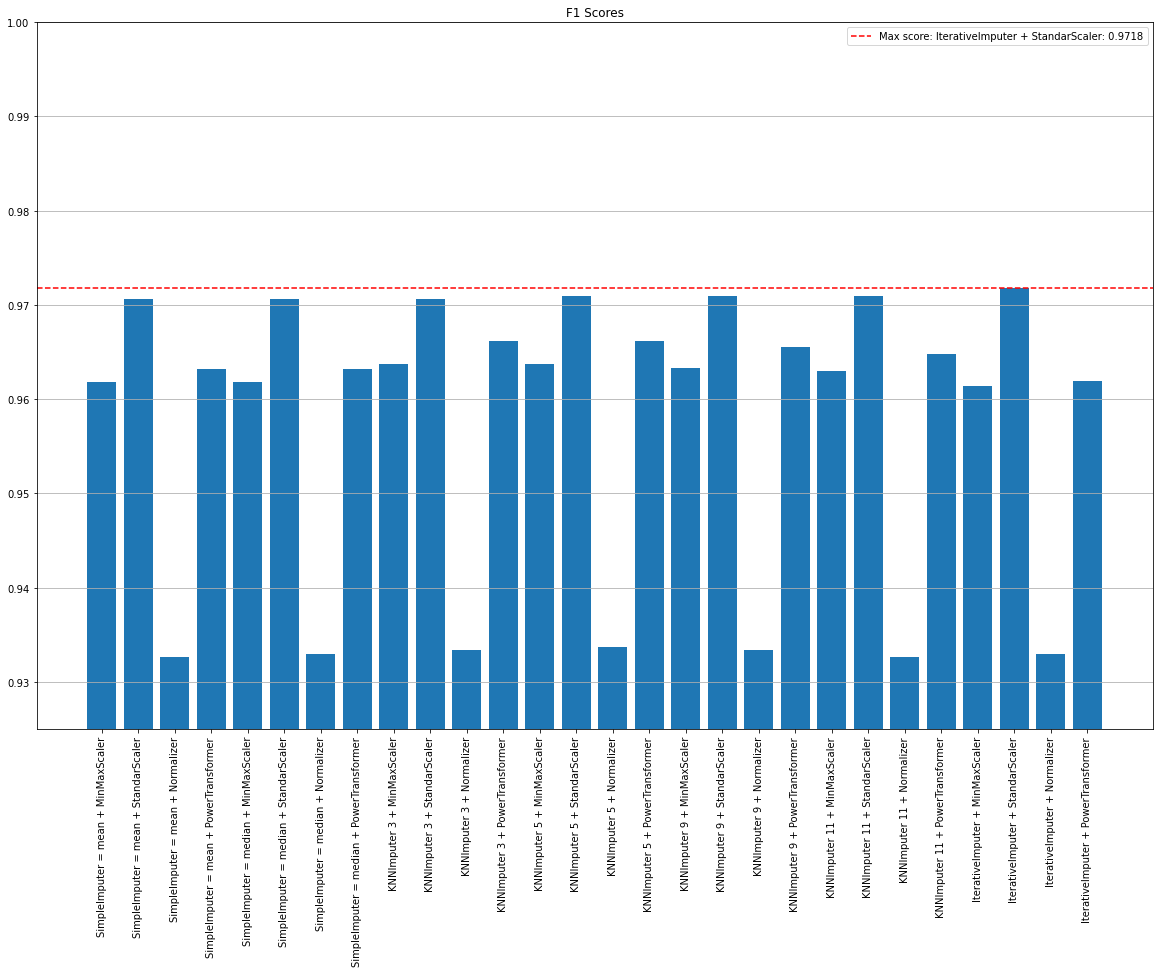

In [32]:
# figsize to adjust size 
fig, ax = plt.subplots(figsize=(20, 13))
ax.bar(combos, scores)
ax.set_title('F1 Scores')

# Set boundries for y axis 
ax.set_ylim([0.925, 1.0])
ax.grid(axis='y')

# Make labels visible
ax.set_xticklabels(combos, rotation=90, ha='center')

# Calculate and show line of max score
max_score_idx = np.argmax(scores)
highest_name, highest_score = combos[max_score_idx], scores[max_score_idx]
ax.axhline(y=scores[max_score_idx], color='r', linestyle='--', label='Max score')

ax.legend([f'Max score: {highest_name}: {highest_score:.4f}'])

plt.show()


## Feature Selection

***
### Prepare dataset using best Imputer and Scaler
 

In [21]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df_encoded_classes, test_size=0.33, random_state=42)

# Impute missing values
imputer = IterativeImputer(random_state=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)



***
### Pearson Correlation between each feature and target classification

In [22]:
# Feature selection using Pearson correlation
corr_coef = np.corrcoef(np.hstack((y_train.reshape((-1, 1)), X_train_scaled)).T)
corr_features_idx = np.where(corr_coef[0, 1:] > 0)[0]
X_train_corr = X_train_scaled[:, corr_features_idx]
X_test_corr = X_test_scaled[:, corr_features_idx]

len(corr_features_idx)

***
### PCA

PC0 - Variance explained:  0.1963 - Total Variance:  0.1963
PC1 - Variance explained:  0.1177 - Total Variance:  0.3140
PC2 - Variance explained:  0.1025 - Total Variance:  0.4165
PC3 - Variance explained:  0.0823 - Total Variance:  0.4988
PC4 - Variance explained:  0.0695 - Total Variance:  0.5683
PC5 - Variance explained:  0.0518 - Total Variance:  0.6201
PC6 - Variance explained:  0.0356 - Total Variance:  0.6557
PC7 - Variance explained:  0.0299 - Total Variance:  0.6856
PC8 - Variance explained:  0.0294 - Total Variance:  0.7149
PC9 - Variance explained:  0.0284 - Total Variance:  0.7433
PC10 - Variance explained:  0.0268 - Total Variance:  0.7700
PC11 - Variance explained:  0.0248 - Total Variance:  0.7949
PC12 - Variance explained:  0.0236 - Total Variance:  0.8185
PC13 - Variance explained:  0.0219 - Total Variance:  0.8404
PC14 - Variance explained:  0.0194 - Total Variance:  0.8598
PC15 - Variance explained:  0.0178 - Total Variance:  0.8776
PC16 - Variance explained:  0.0158

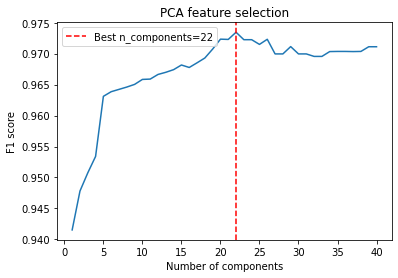

In [23]:


# Feature selection using PCA
pca = PCA(n_components=41)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

tve=0 #total variance explained
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )


# Define the range of number of components to test
n_components_range = range(1, 41)

# Evaluate the models using logistic regression with F1 score
lr = LogisticRegression(random_state=42)
f1_scores = []
for n_components in n_components_range:
    # Feature selection using PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    lr.fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    
# Find the best value of n_components based on F1 score
best_n_components = n_components_range[np.argmax(f1_scores)]

# Plot the results
plt.plot(n_components_range, f1_scores)
plt.xlabel('Number of components')
plt.ylabel('F1 score')
plt.title('PCA feature selection')
plt.axvline(best_n_components, linestyle='--', color='r', label=f'Best n_components={best_n_components}')
plt.legend()
plt.show()


# Feature selection using PCA with optimal value of components
pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Number of features to select
n_best = best_n_components

***
### SelectKBest

In [24]:

# Feature selection using SelectKBest with F-test
k = n_best
selector = SelectKBest(f_classif, k=k)
selector.fit(X_train_scaled, y_train)
X_train_kbest = selector.transform(X_train_scaled)
X_test_kbest = selector.transform(X_test_scaled)

***
### SequentialFeatureSelection

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector

# Feature selection using Sequential Feature Selector
n_features = n_best
sfs = SequentialFeatureSelector(LogisticRegression(random_state=42, max_iter=10000),
                                n_features_to_select=n_features,
                                direction='backward',
                                scoring='f1',
                                cv=5)
sfs.fit(X_train_scaled, y_train)
X_train_sfs = sfs.transform(X_train_scaled)
X_test_sfs = sfs.transform(X_test_scaled)



***
### Putting it all together


In [26]:
# Evaluate the models using logistic regression with F1 score
lr = LogisticRegression(random_state=42)
models = [("Pearson", X_train_corr, X_test_corr),
          ("PCA", X_train_pca, X_test_pca),
          ("SelectKBest", X_train_kbest, X_test_kbest),
          ("SequentialFeatureSelection", X_train_sfs, X_test_sfs)]

print(f'{n_best} features')
for name, X_train_fs, X_test_fs in models:
    lr.fit(X_train_fs, y_train)
    y_pred = lr.predict(X_test_fs)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} with: F1 score = {f1:.4f}")

22 features
Pearson with: F1 score = 0.9077
PCA with: F1 score = 0.9711
SelectKBest with: F1 score = 0.9720
SequentialFeatureSelection with: F1 score = 0.9692


***
### Now onto selecting the best model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Best Imputer, Scaler and Selector 
imputer = IterativeImputer(random_state=42)
scaler = StandardScaler()
selector = SelectKBest(f_classif, k=22)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df_encoded_classes, test_size=0.33, random_state=42)

# Impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Feature selection using SelectKBest with F-test
selector.fit(X_train_scaled, y_train)
X_train_kbest = selector.transform(X_train_scaled)
X_test_kbest = selector.transform(X_test_scaled)


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Define grid of hyperparameters to test
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
cv = GridSearchCV(dtc, param_grid=param_grid, scoring='f1', cv=5)
cv.fit(X_train_kbest, y_train)

# Print the best hyperparameters and performance score
print("Best hyperparameters:", cv.best_params_)
print("Best F1 score:", cv.best_score_)

# Evaluate the model with best hyperparameters on the test set
y_pred = cv.predict(X_test_kbest)

# Check classification scores
classification_scores(y_test, y_pred)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F1 score: 0.9673844974037706
The Precision is:  0.9683
The Recall is:  0.9668
The F1 score is:  0.9676
The Matthews correlation coefficient is:  0.7988
Confusion matrix:
 [[ 202   40]
 [  42 1223]]


In [30]:
from sklearn.metrics import classification_report

# create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1')

# fit the GridSearchCV object to the training data
grid_search.fit(X_train_kbest, y_train)

# print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_kbest)

# Check classification scores
classification_scores(y_test, y_pred)

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
The Precision is:  0.9718
The Recall is:  0.9818
The F1 score is:  0.9768
The Matthews correlation coefficient is:  0.8520
Confusion matrix:
 [[ 206   36]
 [  23 1242]]


In [31]:
# Create a SVC classifier
svc = SVC(random_state=42)

# define the parameter grid to search over
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
Cs = [0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = {"gamma": gammas, "C": Cs}

# fit the GridSearchCV object to the training data
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="f1")
grid_search = grid_search.fit(X_train_kbest, y_train)

# print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_kbest)

# Check classification scores
classification_scores(y_test, y_pred)

Best hyperparameters: {'C': 10, 'gamma': 0.1}
The Precision is:  0.9742
The Recall is:  0.9858
The F1 score is:  0.9800
The Matthews correlation coefficient is:  0.8719
Confusion matrix:
 [[ 209   33]
 [  18 1247]]


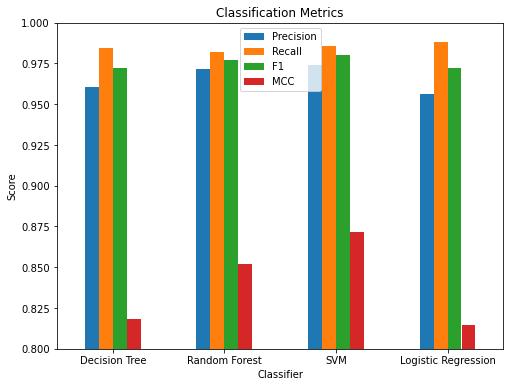

The best classifier is SVM, with the F1 score of 0.97996


In [33]:

# define classifiers
classifiers = [('Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=5, min_samples_split=2, random_state=42)),
               ('Random Forest', RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42)),
               ('SVM', SVC(C=10, gamma=0.1, random_state=42)),
               ('Logistic Regression', LogisticRegression(random_state=42))]

# evaluate classifiers using precision, recall, f1, and MCC metrics
metrics = ['Precision', 'Recall', 'F1', 'MCC']
results = pd.DataFrame(columns=metrics, index=[name for name, clf in classifiers])

for name, clf in classifiers:
    clf.fit(X_train_kbest, y_train)
    y_pred = clf.predict(X_test_kbest)
    results.loc[name, 'Precision'] = precision_score(y_test, y_pred)
    results.loc[name, 'Recall'] = recall_score(y_test, y_pred)
    results.loc[name, 'F1'] = f1_score(y_test, y_pred)
    results.loc[name, 'MCC'] = matthews_corrcoef(y_test, y_pred)

# plot results
fig, ax = plt.subplots(figsize=(8, 6))
results.plot(kind='bar', ax=ax)
ax.set_ylim([0.8, 1.0])
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
plt.xticks(rotation=0)
plt.show()

# print best classifier and its F1 score
results['F1'] = results['F1'].astype(float)
best_classifier = results['F1'].idxmax()
best_score = results.loc[best_classifier, 'F1']
print(f'The best classifier is {best_classifier}, with the F1 score of {best_score:.5f}')